In [1]:
%load_ext autoreload
%autoreload 2

# <span style="color: blue;"> I302 - Aprendizaje Automático y Aprendizaje Profundo

### <span style="color: blue;"> Parcial 1 - 2do Semestre 2024

<span style="color: blue;">

#### 1. **(1.5 puntos)** Si aplicamos el algoritmo de gradiente descendiente para encontrar los pesos óptimos $w^*$ de un modelo de regresión lineal, ¿siempre se converge al mismo vector de pesos óptimos, independientemente del punto semilla $w^{(0)}$? Justifique su respuesta.

- **En la mayoría de los casos, sí converge**: 
  - El algoritmo de gradiente descendiente (GD) converge al mismo vector de pesos óptimos $w^*$ debido a que la función de costo de la regresión lineal es convexa.
  - Esto significa que, independientemente del punto semilla $w^{(0)}$, el algoritmo encontrará el mínimo global.

- **No siempre se converge al mismo vector**:
  - Si el modelo tiene **más parámetros que datos**, pueden surgir múltiples soluciones óptimas debido a la falta de información suficiente para determinar un único $w^*$.
  - Si uno de los **features es linealmente dependiente** de otros, se generan grados de libertad redundantes. En este caso, habrá múltiples $w$ que satisfacen las condiciones de optimalidad, lo que puede llevar a que el algoritmo GD converja a diferentes puntos dependiendo de $w^{(0)}$.


    Caso 1: Generar datos sin características linealmente dependientes

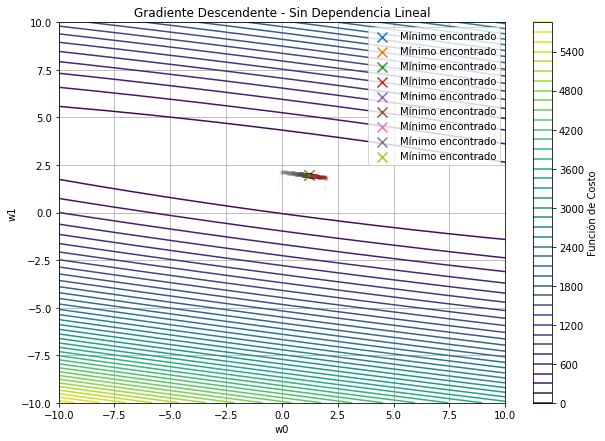

In [5]:
import numpy as np
from utils import *

np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # 100 muestras de un feature
y1 = 2 * X1.flatten() + 1 + np.random.randn(100)  # y = 2x + 1 + ruido

# Agregar una columna de unos para el término de sesgo
X1_b = np.c_[np.ones((X1.shape[0], 1)), X1]

# Parámetros de gradiente descendente
learning_rate = 0.01
n_iterations = 1000

# Ejecutar gradiente descendente con diferentes semillas para el primer caso
seeds = [0, 1, 2, 3, 4, 5, 10, 15, 20]
w_histories1 = []

for seed in seeds:
    np.random.seed(seed)
    w_init = np.random.randn(2)  # Inicializar pesos aleatorios
    w_optimal, costs, w_history = gradient_descent(X1_b, y1, w_init, learning_rate, n_iterations) # type: ignore
    w_histories1.append(w_history)

# Graficar el gradiente descendente para el primer caso
plot_gradient_descent(X1_b, y1, w_histories1, title='Gradiente Descendente - Sin Dependencia Lineal') # type: ignore

    Caso 2: Generar datos con características linealmente dependientes

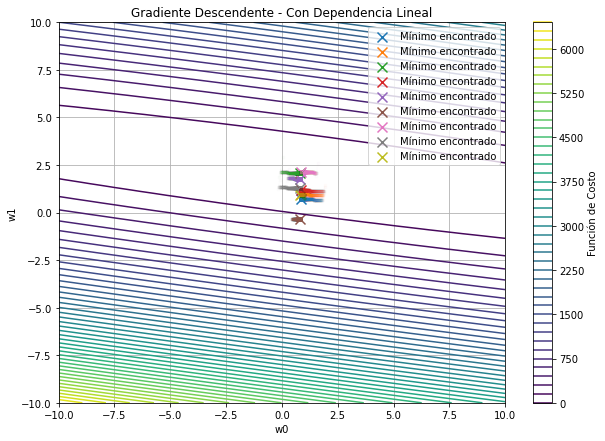

In [6]:
from utils import *

X2 = np.random.rand(100, 1) * 10  # 100 muestras de un feature
X2_dep = X2  # Hacemos que esta característica sea dependiente del primer feature
y2 = 2 * X2.flatten() + 1 + np.random.randn(100)  # y = 2x + 1 + ruido

# Agregar una columna de unos y la característica dependiente
X2_b = np.c_[np.ones((X2.shape[0], 1)), X2, X2_dep]  # Ahora X2_b tiene 3 columnas

# Ejecutar gradiente descendente con diferentes semillas para el segundo caso
w_histories2 = []

for seed in seeds:
    np.random.seed(seed)
    w_init = np.random.randn(3)  # Inicializar pesos aleatorios (ahora hay 3 parámetros)
    w_optimal, costs, w_history = gradient_descent(X2_b, y2, w_init, learning_rate, n_iterations) # type: ignore
    w_histories2.append(w_history)

# Graficar el gradiente descendente para el segundo caso
plot_gradient_descent(X2_b, y2, w_histories2, title='Gradiente Descendente - Con Dependencia Lineal') # type: ignore

<span style="color: blue;">

#### 2. Sea un problema de regresión:

#### <span style="color: blue;"> a) **(1 punto)** ¿Minimizar RMSE es equivalente a maximizar $R^2$? Demuestre matemáticamente su respuesta.

**Root Mean Square Error (RMSE)**:
El RMSE es una medida de la diferencia entre los valores predichos por un modelo y los valores observados. Se define como:

$$
\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}
$$

donde:
- $N$ es el número total de observaciones,
- $y_i$ son los valores observados,
- $\hat{y}_i$ son los valores predichos por el modelo.

El RMSE proporciona una indicación de la magnitud de los errores de predicción, donde un valor menor indica un mejor ajuste del modelo.

---

**Coeficiente de Determinación $R^2$**:
El $R^2$ es una medida de la proporción de variación en los datos que es explicada por el modelo de regresión. Se define como:

$$
R^2 = 1 - \frac{\text{SSres}}{\text{SStot}}
$$

donde:
- $\text{SSres}$ es la Suma de los Residuos al Cuadrado (Suma de los errores cuadrados):

   $$
   \text{SSres} = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
   $$

- $\text{SStot}$ es la Suma Total de los Cuadrados (variación total de los datos respecto a la media).
   $$
   \text{SStot} = \sum_{i=1}^{N} (y_i - \bar{y})^2
   $$

   donde:
   - $\bar{y}$ es la media de los valores observados.
---

**Paso 1:** Empezamos minimizando el RMSE (Root Mean Square Error):

$$
\text{min } \text{RMSE} = \text{min } \sqrt{\frac{1}{N} \text{SSres}} = \text{min } \frac{1}{N} \text{SSres}
$$

**Paso 2:** Debido a que la constante $\frac{1}{N}$ no afecta la minimización, podemos reescribirlo como:

$$
\text{min } \text{RMSE} = \text{min } \text{SSres}
$$

**Paso 3:** Como la Suma Total de los cuadrados ($\text{SStot}$) es constante para un conjunto de datos fijo, minimizar $\text{SSres}$ es equivalente a minimizar $\text{SSres}/\text{SStot}$:

$$
\text{min } \text{RMSE} = \text{min } \text{SSres} = \text{min } \frac{\text{SSres}}{\text{SStot}}
$$

- Minimizar $\frac{\text{SSres}}{\text{SStot}}$ significa reducir el error del modelo, lo que incrementa la cantidad de variación que el modelo logra explicar.

**Paso 4:** Si invertimos el signo para maximizar obtenemos:

$$
\text{min } \text{RMSE} = \text{max } -\frac{\text{SSres}}{\text{SStot}}
$$

- Dado que al minimizar un valor se puede maximizar su negativo.

**Paso 5:** Maximizar $-\frac{\text{SSres}}{\text{SStot}}$ es lo mismo que maximizar $1- -\frac{\text{SSres}}{\text{SStot}}$ dado que el valor máximo de 1 se mantiene constante, y simplemente estamos cambiando el enfoque hacia la maximización de la parte negativa de la fracción:

$$
\text{min } \text{RMSE} = \text{max } 1 - \frac{\text{SSres}}{\text{SStot}} = \text{max } R^2
$$

   - Minimizar $RMSE$ implica que $R^2$ se maximiza.
   - Es equivalente a maximizar $R^2$, ya que al reducir el error del modelo se incrementa la variación explicada, lo que se refleja en el aumento de $R^2$.

#### <span style="color: blue;"> b) **(0.5 puntos)** Si un modelo tiene un R^2 negativo, ¿qué conclusiones puede uno sacar sobre la capacidad predictiva del modelo? 



- Un $R^2$ negativo indica que el modelo es **peor que simplemente predecir la media de la variable de respuesta**, lo que sugiere que el modelo **no captura ninguna relación útil** entre las variables predictivas y la variable objetivo.
- Esto implica que el modelo tiene una **capacidad predictiva deficiente** y que los parámetros elegidos, o el enfoque utilizado, podrían ser inapropiados para el problema en cuestión. 
- En tales casos, sería recomendable revisar la selección de características, la complejidad del modelo o considerar un enfoque alternativo para mejorar el rendimiento.

#### <span style="color: blue;"> 3. **(1 punto)** Marque cuáles de las siguientes afirmaciones son verdaderas y cuáles son falsas.

#### <span style="color: blue;"> a) El ajuste de hiperparámetros de un modelo predictivo se debe realizar siempre mediante cross-validation. </span>

**Falso**: No es el único método posible, también se pueden usar enfoques como por ejemplo la validación simple.

#### <span style="color: blue;"> b) Sea un modelo de regresión lineal localmente ponderada, cuando el hiperparámetro τ (el desvío estándar de la ponderación Gaussiana) tiende a infinito, el modelo tiende a un modelo de regresión lineal. </span>

**Verdadero**: A medida que τ se incrementa, el modelo considera todos los puntos de datos por igual, convergiendo así al modelo de regresión lineal ordinaria.

#### <span style="color: blue;"> c) En un modelo de stacking, que combina la estimación de varios modelos previamente entrenados, agregarle los features originales (además de las estimaciones de los modelos ya entrenados) como entrada al modelo de stacking, no altera la performance del modelo resultante.</span>

**Falso**: Agregar los features originales puede alterar la performance del modelo de stacking, ya que introduce información adicional que puede influir en las predicciones finales, potencialmente cambiando la precisión.

#### <span style="color: blue;"> d) La técnica SMOTE genera datos nuevos que son exactamente iguales, desde un punto de vista estadístico, a los que se generaron cuando se recolectaron los datos originales (es decir, los nuevos datos salen de la misma distribución de probabilidad que los originales).</span>

**Falso**: SMOTE genera nuevos ejemplos sintéticos interpolando entre ejemplos de la clase minoritaria, lo que significa que los nuevos datos no son exactamente iguales a los originales y pueden no seguir la misma distribución estadística.

#### <span style="color: blue;"> 4. **(1 punto)** Sea un problema de clasificación multiclase, ¿Regresión logística multiclase producirá una frontera de clasificación no-lineal en el espacio de features? Demuestre matemáticamente su respuesta.

Consideremos el caso de clasificación multiclase con $K$ clases y un conjunto de características de entrada $\mathbf{x} \in \mathbb{R}^n$.

1. **Modelo lineal para cada clase:**
   El modelo de regresión logística multiclase asigna una probabilidad a cada clase $k$ usando una combinación lineal de las características $\mathbf{x}$:
   
   $$
   z_k = \mathbf{w}_k^T \mathbf{x} + b_k
   $$
   
   donde $\mathbf{w}_k$ es el vector de pesos y $b_k$ es el sesgo para la clase $k$.

2. **Función softmax**:  
   Las probabilidades para cada clase $k$ se calculan utilizando la función softmax:
   
   $$
   P(y = k | \mathbf{x}) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
   $$
   

3. **Frontera de decisión**:
   La frontera de decisión entre dos clases $k$ y $j$ ocurre cuando las probabilidades de ambas clases son iguales:
   
   $$
   P(y = k | \mathbf{x}) = P(y = j | \mathbf{x})
   $$
   
   Esto implica que:
   
   $$
   \frac{e^{z_k}}{\sum_{i=1}^{K} e^{z_i}} = \frac{e^{z_j}}{\sum_{i=1}^{K} e^{z_i}}
   $$
   
   Simplificando:
   
   $$
   e^{z_k} = e^{z_j}
   $$
   
   Tomando el logaritmo natural en ambos lados:
   
   $$
   z_k = z_j
   $$
   
   Sustituyendo $z_k = \mathbf{w}_k^T \mathbf{x} + b_k$ y $z_j = \mathbf{w}_j^T \mathbf{x} + b_j$, obtenemos:
   
   $$
   \mathbf{w}_k^T \mathbf{x} + b_k = \mathbf{w}_j^T \mathbf{x} + b_j
   $$
   
   Reordenando:
   
   $$
   (\mathbf{w}_k - \mathbf{w}_j)^T \mathbf{x} = b_j - b_k
   $$
   
   Esta es la ecuación de un **hiperplano** en el espacio de características, lo que implica que la frontera de decisión entre las clases $k$ y $j$ es **lineal**.

NOTA:
- Si las características de entrada $\mathbf{x}$ son combinaciones **lineales** de las variables originales, la regresión logística multiclase produce una **frontera de clasificación lineal**.
- Sin embargo, si aplicamos **transformaciones no lineales** a las características de entrada (por ejemplo, polinomios o kernels), las fronteras de decisión resultantes pueden volverse **no lineales** en el espacio original de las características.

#### <span style="color: blue;"> 5. **(2.5 puntos)** Sea una red neuronal tipo perceptrón multicapa densamente conectada con \( L \) capas y un promedio de \( M \) nodos por capa (haga de cuenta como que todas las capas tienen la misma cantidad de nodos \( M \)). ¿Cómo crece el costo computacional del cálculo de la gradiente de la función de costo con respecto a los pesos de la red para una muestra \( (x_i, y_i) \), expresada en términos de \( L \) y \( M \), si se realiza mediante el algoritmo backpropagation y mediante diferencias finitas? Para esto se deben contabilizar todas las operaciones de suma y de multiplicación de valores escalares.

<span style="color: blue;"> **Nota:** Recuerde que la multiplicación de una matriz $A \in \mathbb{R}^{n \times m}$ por una matriz $B \in \mathbb{R}^{m \times p}$ tiene un costo computacional orden $O(nmp)$.

- Para entender el costo computacional del algoritmo de **backpropagation**, vamos a analizar cada paso del algoritmo, **cuantificando las operaciones de suma y multiplicación** involucradas. 
- Nos centraremos en una red neuronal con $L$ capas, $M$ nodos por capa, y analizaremos la cantidad de operaciones requeridas para calcular la gradiente de la función de costo $L_i$ con respecto a los pesos $W(l)$ de cada capa.

### Algoritmo backpropagation

---

#### **1. Forward-pass (propagación hacia adelante)**

En la primera parte del algoritmo, propagamos las entradas a través de todas las capas hasta obtener la predicción final $\hat{y_i}$. Veamos cuántas operaciones involucramos en cada paso:

1. **Entrada:**
   $$
   z^{(0)} = x_i \quad (\text{entrada inicial a la red})
   $$
   Sin operaciones, simplemente es el dato de entrada.

2. **Cálculo de preactivaciones para cada capa $l$:**
   $$
   a^{(l)} = W^{(l)} z^{(l-1)} + w_0^{(l)}
   $$
   - $W^{(l)}$ tiene dimensiones $M \times M$, y $z^{(l-1)}$ es un vector de $M$ entradas.
   - Para calcular $a^{(l)}$, hacemos una multiplicación matricial entre $W^{(l)}$ y $z^{(l-1)}$, lo cual requiere $M^2$ multiplicaciones y $M(M-1)$ sumas. La suma final con el bias $w_0^{(l)}$ requiere $M$ sumas adicionales.
   - Esto resulta en un total de $M^2$ multiplicaciones y $M^2$ sumas por capa.

3. **Aplicación de la función de activación:**
   $$
   z^{(l)} = h^{(l)}(a^{(l)})
   $$
   - Para cada nodo en la capa $l$, aplicamos la función de activación, que requiere $M$ operaciones (una por cada nodo). Este paso suma $M$ operaciones por capa.

4. **Costo total para Forward-Pass**:

- Dado que hay $L$ capas, el costo total para todas las capas en el forward-pass es:

$$ O(L \times (2M^2 + M)) \approx O(L \times M^2)$$

- Podemos despreciar el término lineal cuando $M$ es grande.
---

#### **2. Cálculo de la predicción final $\hat{y_i}$**

En la capa de salida $L$, la salida es simplemente el valor de $z^{(L)}$, es decir:
$$
\hat{y_i} = z^{(L)}
$$
No hay operaciones extra.

---

#### **3. Cálculo de la función de costo $L_i$**

La función de costo depende de la salida $\hat{y_i}$ y el valor real $y_i$, y en este caso es una operación que involucra restar y calcular alguna función como la entropía cruzada o el error cuadrático medio. Sin embargo, para simplificar los cálculos, vamos a contar este paso como una operación que no varía mucho entre diferentes métodos de aprendizaje.

---

### Backward-pass (propagación hacia atrás)

Ahora pasamos al cálculo de la gradiente. Vamos a calcular la cantidad de operaciones involucradas en cada paso.

#### **4. Inicialización del gradiente en la capa de salida:**
$$
\delta^{(L)} = h'^{(L)}(a^{(L)}) \odot \frac{\partial L_i}{\partial \hat{y_i}}
$$
- Aca, $h'^{(L)}(a^{(L)})$ es la derivada de la función de activación en la capa de salida, aplicada elemento por elemento a cada nodo de la capa de salida. Esto requiere $M$ multiplicaciones.
- Luego, multiplicamos cada valor por la derivada de la función de costo con respecto a $\hat{y_i}$, lo que también requiere $M$ multiplicaciones. 
- En total, tenemos $2M$ operaciones.

#### **5. Gradiente de los pesos en la capa de salida:**
$$
\frac{\partial L_i}{\partial W^{(L)}} = \delta^{(L)} z^{(L-1)T}
$$
- Este es un producto externo entre un vector de tamaño $M$ ($\delta^{(L)}$) y la transpuesta del vector de activaciones de la capa anterior ($z^{(L-1)}$), también de tamaño $M$.
- Requiere $M^2$ multiplicaciones para cada peso y $M(M-1)$ sumas para obtener la matriz de gradientes. 
- En total, $2M^2 - M$ operaciones.

#### **6. Propagación del gradiente hacia atrás:**
Para las capas intermedias ($L-1$ a $1$), calculamos las deltas y los gradientes de los pesos.

1. **Cálculo de $\delta^{(l)}$ para cada capa:**
   $$
   \delta^{(l)} = h'^{(l)}(a^{(l)}) \odot W^{(l+1)T} \delta^{(l+1)}
   $$
   - El término $W^{(l+1)T} \delta^{(l+1)}$ es una multiplicación matricial entre la transpuesta de $W^{(l+1)}$ ($M \times M$) y el vector $\delta^{(l+1)}$ ($M \times 1$), lo que requiere $M^2$ multiplicaciones y $M(M-1)$ sumas.
   - Luego, multiplicamos cada resultado por $h'^{(l)}(a^{(l)})$, lo que implica otras $M$ multiplicaciones. 
   - En total, $M^2 + M$ operaciones.

2. **Gradiente de los pesos:**
   $$
   \frac{\partial L_i}{\partial W^{(l)}} = \delta^{(l)} z^{(l-1)T}
   $$
   Este es el mismo cálculo que para la capa de salida, un producto externo que requiere $2M^2 - M$ operaciones.

#### 7. **Costo total para Backward-Pass**:

- Este proceso se repite para cada una de las $L$ capas, comenzando desde la capa de salida hacia la entrada, por lo tanto el costo total para todas las capas en el backward-pass es:

$$ O(L \times (6 \times M^2)) = O(L \times M^2)$$


---

### **Costo total de backpropagation:**

Sumando las operaciones de cada paso (forward y backward) para todas las capas:

1. Forward-pass: $O(L \times M^2)$
2. Backward-pass: $O(L \times M^2)$

En total, el costo de backpropagation es aproximadamente $O(L \times M^2)$, lo cual es **muy eficiente** en comparación con otros métodos como veremos a continuación.

---

### Algoritmo diferencias finitas

Para calcular el gradiente usando **diferencias finitas**, analizamos el número de operaciones involucradas en cada paso.

### 1. Cálculo del gradiente por diferencias finitas:

Para un peso $W_{ij}^{(l)}$ en la capa $l$, el gradiente de la función de costo con respecto a este peso se aproxima como:

$$
\frac{\partial L_i}{\partial W_{ij}^{(l)}} \approx \frac{L_i(W_{ij}^{(l)} + \epsilon) - L_i(W_{ij}^{(l)} - \epsilon)}{2\epsilon}
$$

Esto implica que, para calcular el gradiente de cada peso, necesitamos:

1. Evaluar la función de costo **dos veces**: una vez para $W_{ij}^{(l)} + \epsilon$ y otra para $W_{ij}^{(l)} - \epsilon$.
2. Realizar una resta y una división por $2\epsilon$, que son operaciones insignificantes comparadas con la evaluación de la red neuronal.

### 2. Cálculo del gradiente para toda la red:

El número total de pesos en una red neuronal de $L$ capas con $M$ nodos por capa es:

$$
\text{Total de pesos} = M^2 \times L
$$

(Entre una capa oculta y la siguiente hay $M$ nodos conectados a $M$ nodos, es decir $M^2$ pesos. Si asumimos que esto se da en las L capas, es $M^2 \times L$)

- Recordemos que necesitamos calcular la función de costo **dos veces** por cada uno de estos $M^2 \times L$ pesos.

### 3. Costo computacional de diferencias finitas:

1. **Costo de una evaluación de la función de costo $L_i$**:
   - Evaluar la función de costo requiere realizar un **forward-pass** a través de la red, que involucra $O(L \times M^2)$ operaciones (como ya calculamos para backpropagation).

2. **Costo total de calcular el gradiente por diferencias finitas**:
   - Como cada evaluación del gradiente con diferencias finitas requiere evaluar la función de costo dos veces, el costo total para calcular el gradiente de **todos los pesos** de la red es:

$$
\text{Costo total} = 2 \times (\text{Número total de pesos}) \times (\text{Costo de forward-pass})
$$

Sustituyendo los valores:

$$
\text{Costo total} = 2 \times (M^2 \times L) \times O(L \times M^2)
$$

Simplificando:

$$
O(L^2 \times M^4)
$$

### Comparación con Backpropagation:

1. **Backpropagation**: El costo total es $O(L \times M^2)$.
2. **Diferencias finitas**: El costo total es $O(L^2 \times M^4)$.

### Conclusión:

El algoritmo de **backpropagation** es significativamente más eficiente que las diferencias finitas. Mientras que backpropagation tiene un costo de $O(L \times M^2)$, las diferencias finitas escalan mucho peor, con un costo de $O(L^2 \times M^4)$, lo que lo hace impráctico para redes neuronales grandes o profundas.

#### <span style="color: blue;"> 6. **(1 punto)** Marque cuáles de las siguientes afirmaciones son verdaderas y cuáles son falsas.

#### <span style="color: blue;"> a) Bootstrapping solamente se puede aplicar a árboles de decisión. </span>

**Falso**: Bootstrapping no se limita a los árboles de decisión. Es una técnica de remuestreo que puede aplicarse a una variedad de algoritmos de machine learning. Ejemplo: redes neuronales pueden ser entrenadas con diferentes muestras bootstrap para generar un conjunto de modelos (un ensamble) que promedian sus salidas o hacen votación para mejorar la precisión.

#### <span style="color: blue;"> b) XGBoost es un método por el cual se genera una serie de árboles de decisión independientes, y luego se forma un ensamble de todos estos árboles promediando sus estimaciones.</span>

**Falso**: XGBoost no genera árboles de decisión independientes. Es un método de boosting, donde los árboles se construyen secuencialmente, y cada uno corrige los errores del anterior.

#### <span style="color: blue;"> c) Boosting busca mejorar la capacidad predictiva de los modelos mediante el re-muestreo de los datos de entrenamiento.</span>

**Falso**: Boosting no utiliza re-muestreo de los datos. En cambio, ajusta iterativamente el modelo, ponderando los ejemplos mal clasificados para mejorar el rendimiento.

Para aclarar:

- Bagging (Bootstrap Aggregating): Este método genera múltiples subconjuntos de datos __re-muestreados__ mediante bootstrapping (seleccionando muestras aleatorias con reemplazo). Luego, entrena un modelo en cada subconjunto y combina los resultados (por ejemplo, con un promedio o votación). Un ejemplo clásico es el Random Forest.

- Boosting: No usa re-muestreo de los datos. En su lugar, ajusta los modelos de manera secuencial. Cada modelo nuevo intenta corregir los errores de los modelos anteriores, y los ejemplos mal clasificados reciben más peso en las iteraciones posteriores. Un ejemplo clásico es XGBoost.

#### <span style="color: blue;"> d) XGBoost siempre produce modelos predictivos que son mejores que los que produce Random Forest.</span>

**Falso**: XGBoost no siempre supera a Random Forest. El rendimiento depende del problema y del conjunto de datos en cuestión.

#### <span style="color: blue;"> 7. **(0.5 puntos)** Describa las distintas estrategias de regularización que podría aplicar al entrenamiento de una red neuronal.

Existen varias estrategias para regularizar el entrenamiento de una red neuronal y prevenir el sobreajuste, es decir, cuando el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalización en datos nuevos. Cuatro métodos comunes de regularización son:

### 1. **Regularización L1 (Lasso)**

La regularización L1 agrega un término a la función de costo que penaliza la suma de los valores absolutos de los pesos:

$$
L = L_0 + \lambda \sum |W|
$$

- **Función**: La regularización L1 tiende a hacer que algunos de los pesos sean exactamente cero, lo que efectivamente selecciona características, reduciendo la complejidad del modelo. Es útil cuando se busca un modelo más simple y menos propenso al sobreajuste.
- El hiperparámetro $\lambda$ controla la magnitud de la penalización. A mayor $\lambda$, mayor es la regularización.

### 2. **Regularización L2 (Ridge)**

La regularización L2 agrega un término que penaliza la suma de los cuadrados de los pesos a la función de costo:

$$
L = L_0 + \lambda \sum W^2
$$

- **Función**: L2 tiende a reducir los valores de los pesos, haciéndolos más pequeños pero sin llevarlos a cero. Esto estabiliza el modelo al reducir la sensibilidad a los datos de entrenamiento, permitiendo mejor generalización.
- Al igual que en L1, el hiperparámetro $\lambda$ controla la intensidad de la penalización.


### 3. **Dropout**

Dropout es una técnica que aleatoriamente "apaga" un subconjunto de neuronas durante cada paso de entrenamiento, con una probabilidad de dropout $p$:

- **Función**: Al eliminar algunas neuronas en cada forward pass, el modelo no depende de un subconjunto específico de neuronas. Esto fuerza a la red a aprender representaciones más robustas, ya que no puede contar siempre con la misma combinación de nodos. Dropout actúa como un ensamble interno de redes más pequeñas.


### 4. **Early Stopping**

Early stopping monitorea el rendimiento del modelo en un conjunto de validación durante el entrenamiento y detiene el proceso cuando el modelo empieza a sobreajustarse:

- **Función**: Cuando el error en el conjunto de validación deja de mejorar (o empieza a empeorar), el entrenamiento se detiene antes de que el modelo se sobreajuste a los datos de entrenamiento. Esto permite utilizar suficientes épocas para que el modelo aprenda patrones sin llegar a capturar el ruido de los datos.
- Se monitorea una métrica (como la pérdida o la precisión en validación) y se detiene el entrenamiento cuando esta métrica no mejora después de cierto número de iteraciones consecutivas (paciencia).

#### <span style="color: blue;"> 8. **(1 punto)** Sea un problema de clasificación binaria, donde \( y=1 \) indica las muestras de la clase positiva, e \( y=0 \) indica muestras de la clase negativa. Si entrenamos un modelo de clasificación mediante la minimización de la entropía cruzada re-pesada (como se muestra abajo), ¿incrementar el valor del hiperparámetro $\lambda_1$ tenderá a *__reducir__* la cantidad de falsos positivos o la cantidad de falsos negativos? Justifique su respuesta. $$ L = -\sum_{i = 1}^N \lambda_1 y_i \ln(\hat{y}(x_i,w)) + \lambda_2 (1-y_i) \ln(1 - \hat{y}(x_i,w) $$

- En un problema de clasificación binaria, se usa la entropía cruzada re-pesada para entrenar un modelo, donde $y=1$ representa la clase positiva e $y=0$ la clase negativa. 

- Acá, $\hat{y}(x_i, w)$ es la predicción del modelo para la muestra $x_i$, y $\lambda_1$ y $\lambda_2$ son los hiperparámetros que ponderan la importancia de las clases positiva y negativa, respectivamente.

- **Efecto de Incrementar $ \lambda_1 $**:

    - Aumentar $\lambda_1$ significa que se da más peso a las muestras de la clase positiva. 
    - Esto aumenta el costo asociado a las predicciones incorrectas de la clase positiva (falsos negativos).
    - Con un $\lambda_1$ más alto, el modelo se verá más incentivado a clasificar correctamente las muestras de la clase positiva. 
    - En consecuencia, llevará a una __reducción en la cantidad de falsos negativos__ (muestras que realmente son positivas pero son clasificadas como negativas).

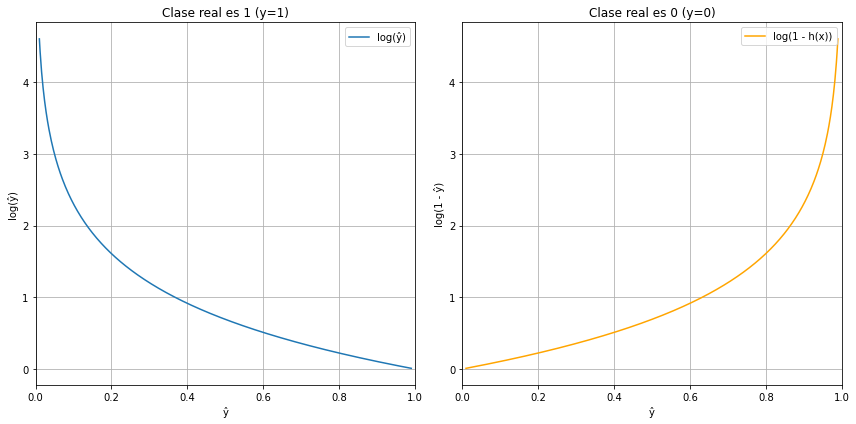

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x_plot = np.linspace(0.01, 0.99, 500) 

cost_h = -np.log(x_plot)
cost_1_minus_h = -np.log(1 - x_plot)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_plot, cost_h, label='log(ŷ)')
plt.title('Clase real es 1 (y=1)')
plt.xlabel('ŷ')
plt.ylabel('log(ŷ)')
plt.xlim(0, 1)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_plot, cost_1_minus_h, label='log(1 - h(x))', color='orange')
plt.title('Clase real es 0 (y=0)')
plt.xlabel('ŷ')
plt.ylabel('log(1 - ŷ)')
plt.xlim(0, 1) 
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()